In [1]:
%reset -f
import pandas as pd
import numpy as np
from wavhandler import *

ERROR:root:Invalid alias: The name clear can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name more can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name less can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name man can't be aliased because it is another magic command.


In [2]:
data1 = Dataset('Leafminers')
data1.read(data=data1.target_classes[0], setting='psd_dB', labels='text')

data2 = Dataset('Leafminers')
data2.read(data=data2.target_classes[1], setting='psd_dB', labels='text')
data2.y = data2.y.apply(lambda x: x+'_')

data3 = Dataset('Thomas')
data3.read(data=data3.target_classes[1], setting='psd_dB', labels='text')

data4 = Dataset('LG')
data4.read(data=data4.target_classes[1], setting='psd_dB', labels='text')

data5 = Dataset('Thomas')
data5.read(data=data5.target_classes[0], setting='psd_dB', labels='text')

Data: Cichorii.
Read 1451 filenames in 0.07 seconds.
Loaded data into matrix in 0.61 seconds.
Data: Cichorii_v2.
Read 4104 filenames in 0.05 seconds.
Loaded data into matrix in 1.80 seconds.
Data: Suzukii.
Read 13619 filenames in 0.24 seconds.
Loaded data into matrix in 4.18 seconds.
Data: LG_zapr_26_09.
Read 7210 filenames in 0.08 seconds.
Loaded data into matrix in 1.93 seconds.
Data: Melanogaster.
Read 6811 filenames in 0.13 seconds.
Loaded data into matrix in 1.95 seconds.


In [86]:
def clean_df(dataset, th):
    df = dataset.X.copy()
    dataset.y.index = list(dataset.y.reset_index(drop=True).index)
    df['var'] = df.apply(lambda x: x.iloc[10:50].var(), axis=1)
    inds = df[(df['var']>th)].index
    print(dataset.y.loc[inds].shape[0])
    print(dataset.X.shape[0])
    print(inds.shape[0])
    return dataset.X.loc[inds].copy(), dataset.y.loc[inds].copy()

In [87]:
data1.X, data1.y = clean_df(data1, 10)
data2.X, data2.y = clean_df(data2, 10)
data3.X, data3.y = clean_df(data3, 10)
data4.X, data4.y = clean_df(data4, 10)
data5.X, data5.y = clean_df(data5, 10)

753
1451
753
2374
4104
2374
2011
13619
2011
7002
7210
7002
3176
6811
3176


In [94]:
big = pd.DataFrame()

big = pd.concat([data1.X, data2.X, data3.X, data4.X, data5.X], axis=0)
big['y'] = pd.concat([data1.y, data2.y, data3.y, data4.y, data5.y], axis=0)
big.dropna(how='any', axis=1, inplace=True)
big.shape

(15316, 130)

Class balance: 
LG_zapr_26_09    7002
Melanogaster     3176
Cichorii_v2_     2374
Suzukii          2011
Cichorii          753
Name: y, dtype: int64

Name: model, ac: 0.969321


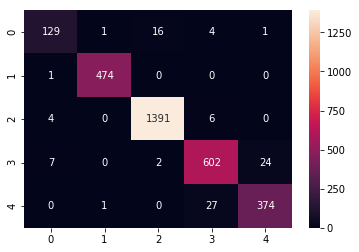

     importance
14     0.098233
13     0.085241
6      0.049971
86     0.042895
103    0.039649


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=325,
       n_jobs=-1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [97]:
from utils_train import make_classification_ml
make_classification_ml(big.iloc[:,:-1],big.y, clf_name='xgboost',undersampling=False)

In [98]:
data1.get_sensor_features()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9631bd2ac8>,
      dtype=object)

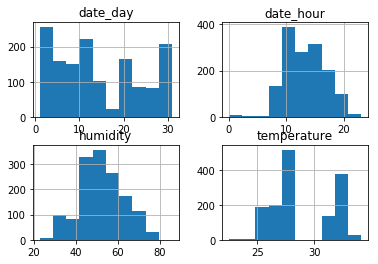

In [209]:
data1.df_features.hist()

In [211]:
data2.get_sensor_features(version='2')

VERSION 2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f965fcadef0>,
      dtype=object)

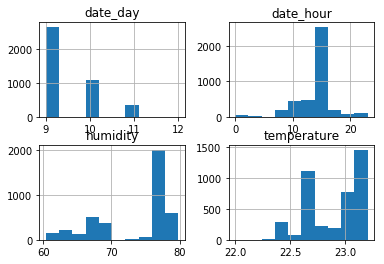

In [212]:
data2.df_features.hist()

Data: Cichorii.
Read 1451 filenames in 0.06 seconds.
Loaded data into matrix in 0.25 seconds.


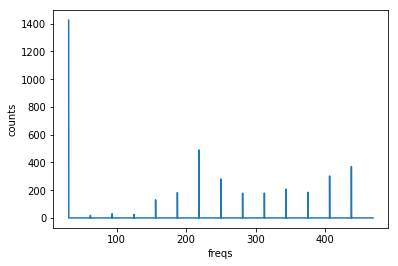

In [214]:
dt1 = Dataset('Leafminers')
dt1.read(data=dt1.target_classes[0], setting='read', labels='text')
dt1.get_frequency_peaks()

Data: Cichorii_v2.
Read 4104 filenames in 0.09 seconds.
Loaded data into matrix in 0.58 seconds.


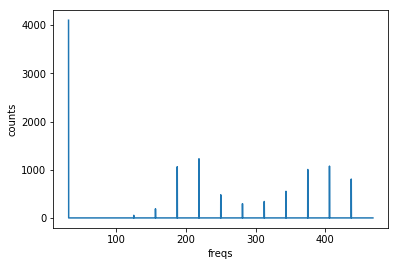

In [215]:
dt2 = Dataset('Leafminers')
dt2.read(data=dt1.target_classes[1], setting='read', labels='text')
dt2.get_frequency_peaks()

In [246]:
perform_analysis(X,y)

Explained Variance with 3 components: 0.78


ValueError: array length 15316 does not match index length 37818

<Figure size 720x576 with 0 Axes>

In [247]:
y.shape

(37818,)

In [248]:
X.shape

(15316, 129)

In [3]:
data2.get_sensor_features(version='2')

VERSION 2


In [17]:
def clean_inds(dataset, th):
    df = dataset.X.copy()
    dataset.y.index = list(dataset.y.reset_index(drop=True).index)
    df['var'] = df.apply(lambda x: x.iloc[10:50].var(), axis=1)
    inds = df[(df['var']>th)].index
    return inds.values

/home/kalfasyan/miniconda3/envs/wingbeats/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


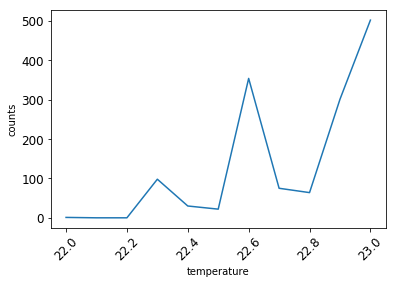

In [20]:
np_hist(data2.df_features.loc[clean_inds(data2, 10)].dropna(), 'temperature')

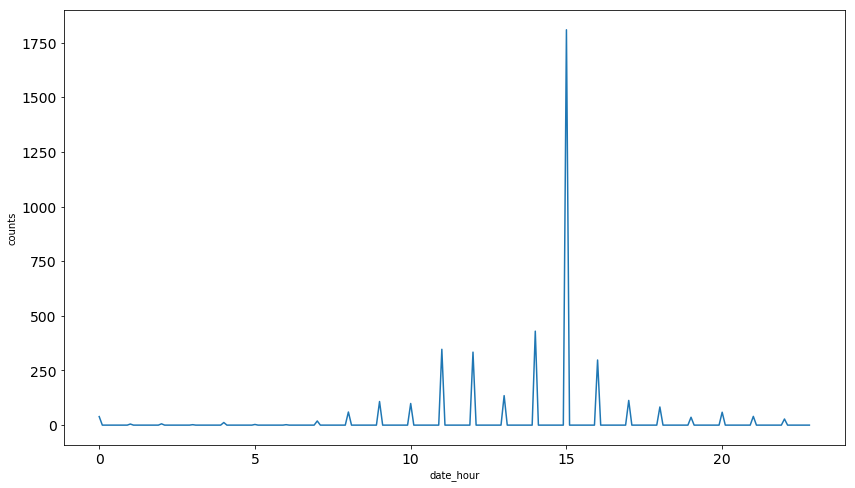

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,8))
np_hist(data2.df_features, 'date_hour', rot=0, fs=14)


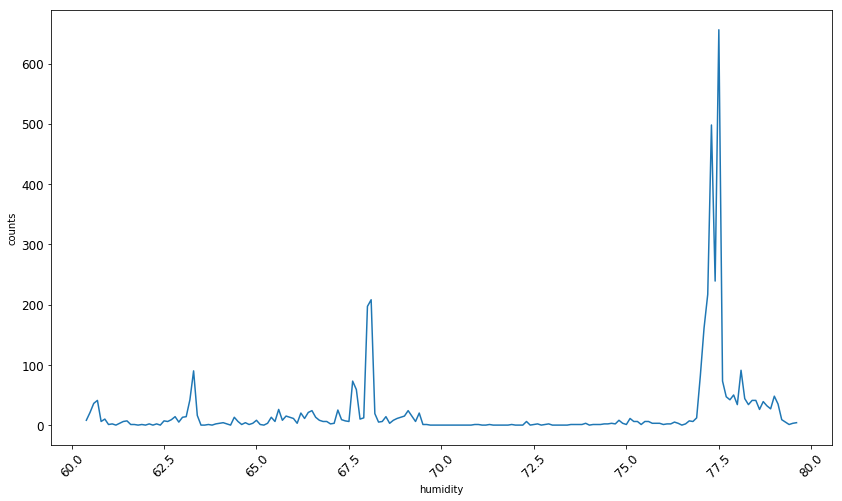

In [16]:
plt.figure(figsize=(14,8))
np_hist(data2.df_features, 'humidity')

In [23]:
data2.df_features.date.sort_values(ascending=False)

4084   2019-08-12 12:00:18
3020   2019-08-12 02:37:45
3661   2019-08-11 23:47:15
4812   2019-08-11 23:21:59
4755   2019-08-11 23:16:38
2833   2019-08-11 23:16:32
1822   2019-08-11 23:15:53
1863   2019-08-11 23:15:51
4334   2019-08-11 23:04:09
5382   2019-08-11 22:55:34
5333   2019-08-11 22:33:21
2937   2019-08-11 22:33:18
4682   2019-08-11 21:43:55
4618   2019-08-11 21:43:24
2176   2019-08-11 21:03:28
4368   2019-08-11 21:02:02
3727   2019-08-11 21:01:23
4843   2019-08-11 21:01:19
5012   2019-08-11 20:56:01
2733   2019-08-11 20:44:32
5428   2019-08-11 20:41:28
3212   2019-08-11 20:41:27
1939   2019-08-11 20:40:42
5192   2019-08-11 20:40:41
2668   2019-08-11 20:39:23
4362   2019-08-11 20:39:02
4423   2019-08-11 20:38:58
4174   2019-08-11 20:38:57
4126   2019-08-11 20:38:53
4207   2019-08-11 20:38:12
               ...        
4700   2019-08-09 14:36:23
4829   2019-08-09 14:36:21
4002   2019-08-09 14:36:20
4227   2019-08-09 14:36:10
4532   2019-08-09 14:36:07
2059   2019-08-09 14:36:02
5